<a href="https://colab.research.google.com/github/mngugi/DS_Collections/blob/main/Seaborn_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

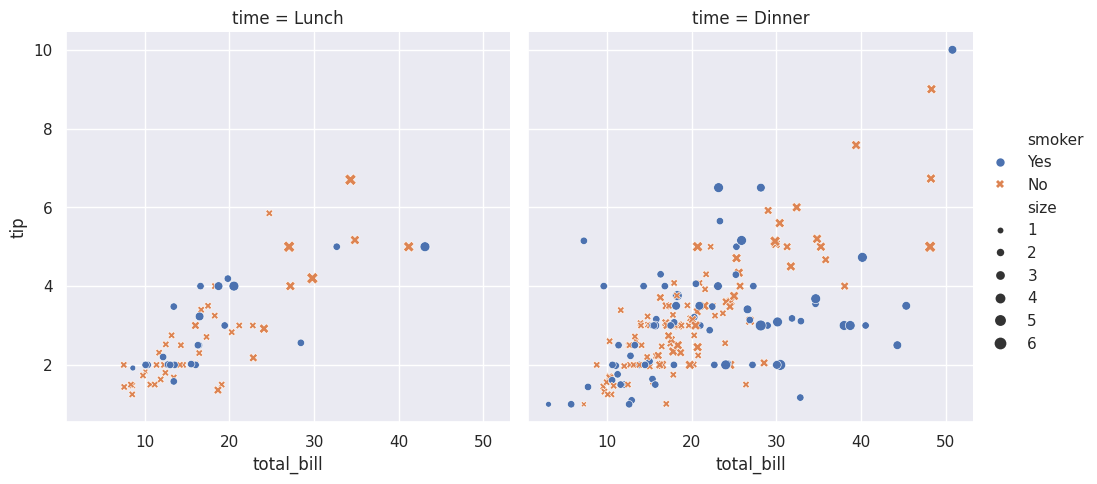

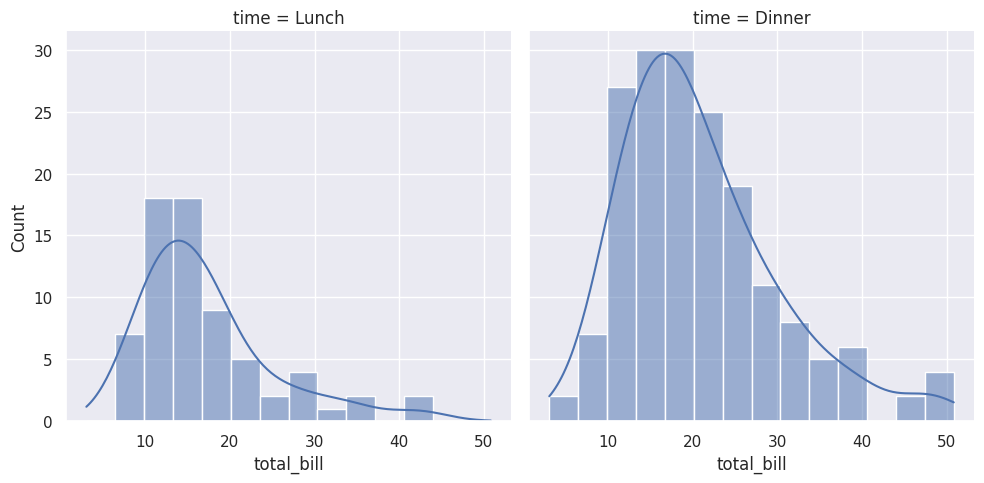

In [3]:
# introduction to seaborn

import seaborn as sns

sns.set_theme()


# load data set sample tips

tips = sns.load_dataset("tips")

sns.relplot(
    data=tips, x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
 )

# Distribution representations using histograms
sns.displot(data=tips, x="total_bill", col="time", kde=True)
# Distribution representations using kernel density estimamtions
sns.displot(data=tips, kind="ecdf", x="total_bill", col="time", hue="smoker", rug=True)


,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


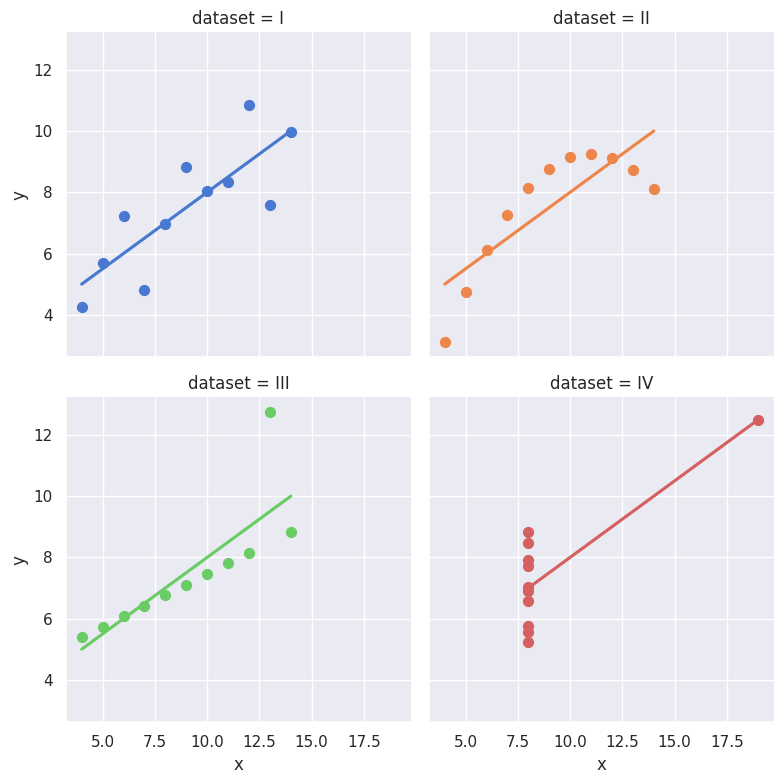

In [ ]:
# Anscombe Quartet
# a sample for scatterplot

import seaborn as sns

#setting the graph theme
sns.set_theme(style = "darkgrid")

#load the dataset anscombe from seaborn
Anscombe_Dt = sns.load_dataset("anscombe")

# plot the graphs using lmplot
sns.lmplot(data= Anscombe_Dt, x= "x", y="y",
           hue= "dataset",col = "dataset", col_wrap=2, palette= "muted",
           ci=None,height=4, scatter_kws={"s": 50, "alpha": 1})

#view the anscombe table
Anscombe_Dt.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


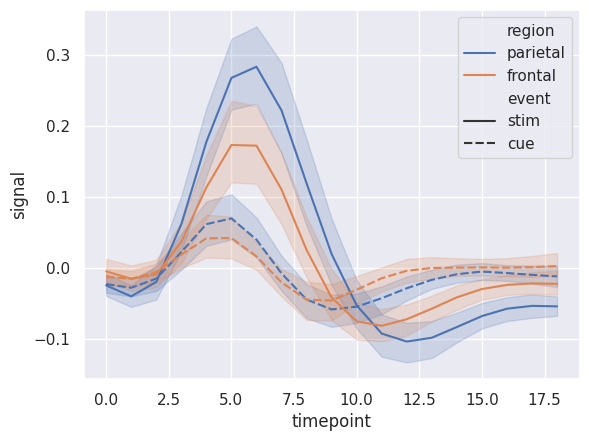

In [ ]:
# lineplot visualization Code
# for Time series with error bands

# import seaborn package
import seaborn as sns

#setting the graph theme
sns.set_theme( style ="darkgrid")

#load the dataset fmri from seaborn
fmri= sns.load_dataset("fmri")

#plot the line plot graph
sns.lineplot(x="timepoint", y = "signal",
             data=fmri, hue="region", style="event")
# view fmri table
fmri.head()


<Axes: xlabel='carat', ylabel='price'>

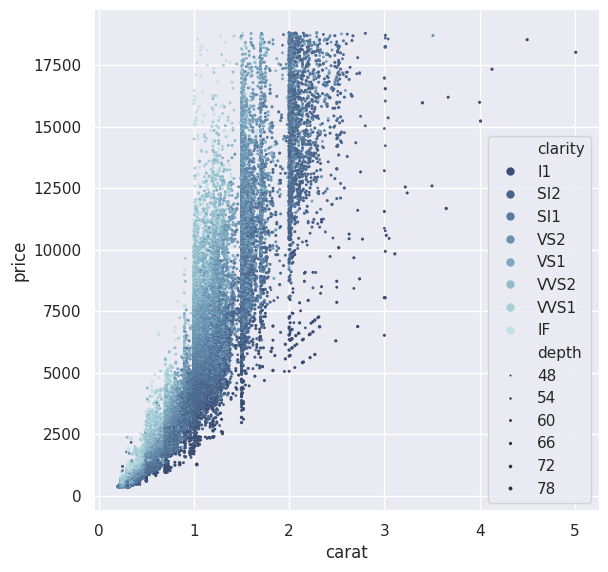

In [ ]:
# A scatterplot with multiple sematics
# import seaboorn, and matplotlib

import seaborn as sns
import matplotlib.pyplot as plt

# set theme style
sns.set_theme(style= "darkgrid")

# load data set diamonds

diamond_Dt = sns.load_dataset("diamonds")
diamond_Dt.head()

# create a figure with axis f, and ax
f, ax = plt.subplots(figsize = (6.5, 6.5))
sns.despine(f, left=True, bottom=True)

# define clarities to be used for ranking
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]

sns.scatterplot(x="carat", y="price",
                hue="clarity", size="depth",
                palette="ch:r=-.2,d=.3_r", # Color palette
                hue_order=clarity_ranking, # Order for clarity levels
                sizes=(1, 8), linewidth=0, # Size settings
                data=diamond_Dt, ax=ax)    # Data and axis

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


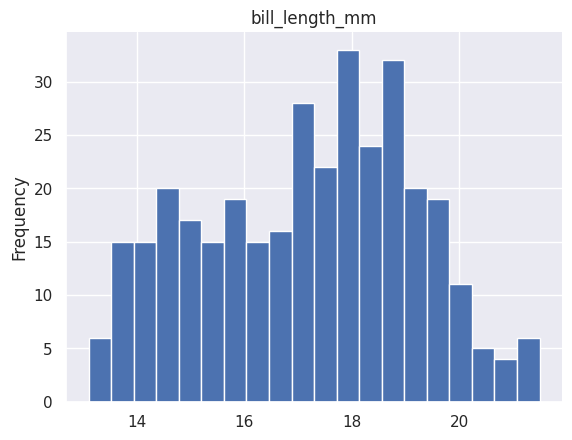

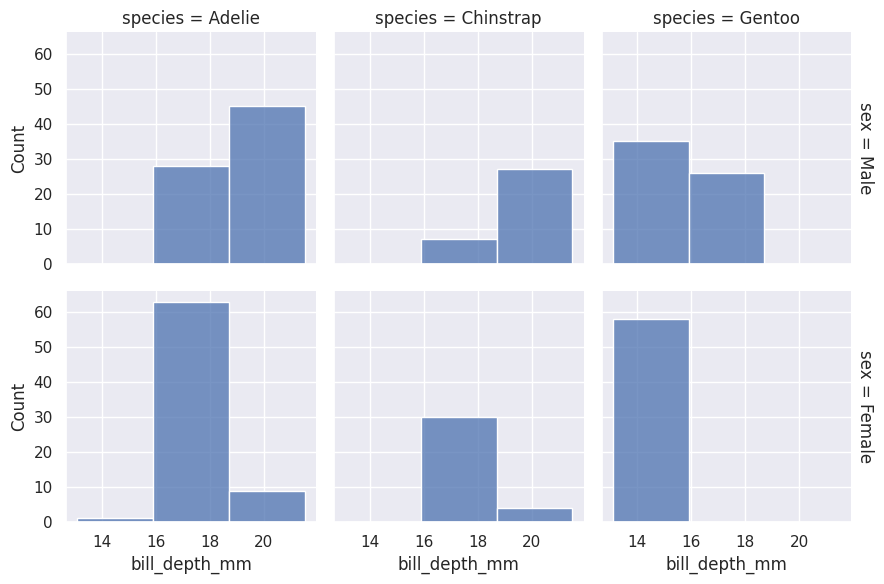

In [ ]:
# facetting histograms by data subsets

#import seaborn
import seaborn as sns

#set the style
sns.set_theme(style="darkgrid")

#load data set penguins

penguines_DT = sns.load_dataset("penguins")

# this code is for a single histogram
penguines_DT['bill_depth_mm'].plot(kind='hist', bins=20, title='bill_length_mm')
plt.gca().spines[['top','right',]].set_visible(False)

sns.displot(
    penguines_DT, x="bill_depth_mm", col="species", row="sex",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)
# view the table
penguines_DT.head()

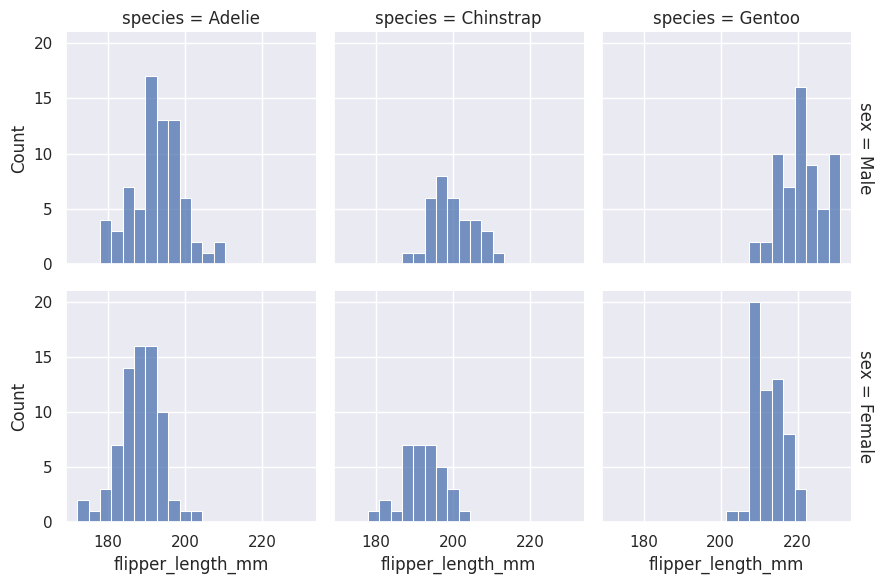

In [ ]:
sns.displot(
    penguines_DT, x="flipper_length_mm", col="species", row="sex",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

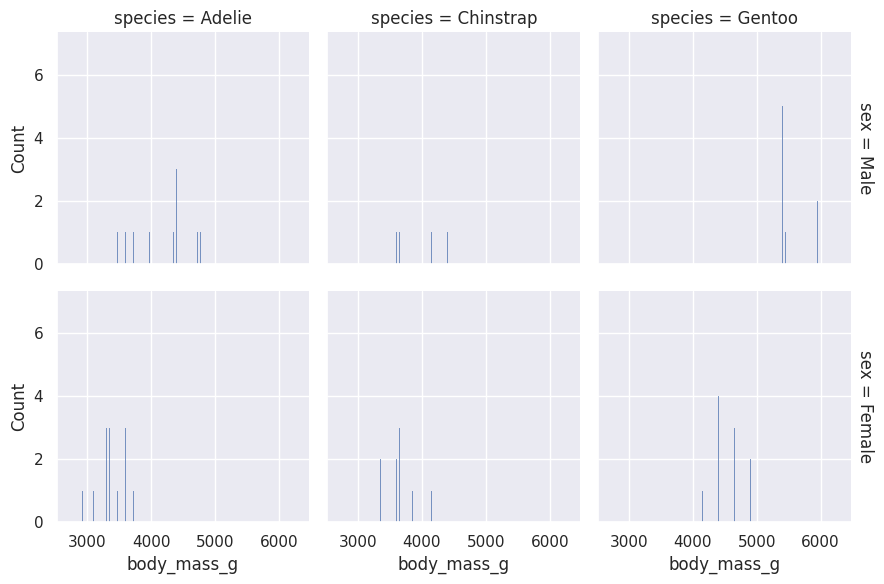

In [ ]:
sns.displot(
    penguines_DT, x="body_mass_g", col="species", row="sex",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


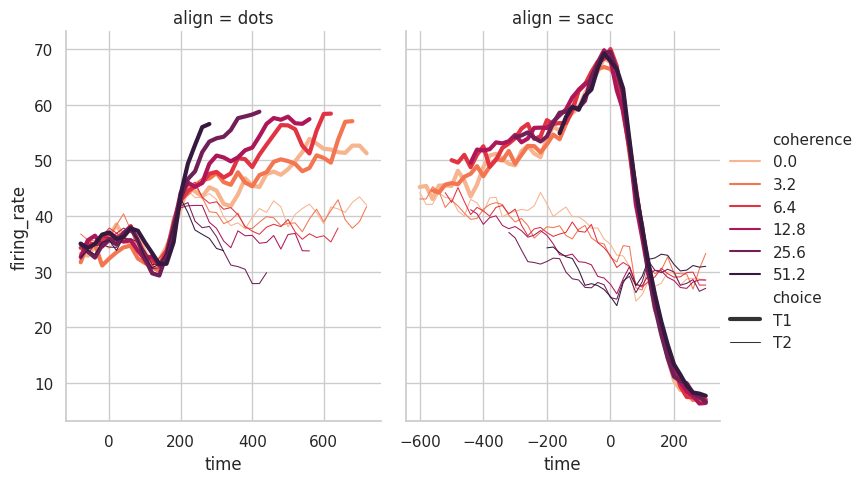

In [ ]:
# line plots on multiple facets

# import seaborn
import seaborn as sns

# set theme

sns.set_theme(style="whitegrid")

#load dataset
dots_DT = sns.load_dataset("dots")



palette = sns.color_palette("rocket_r")

# Plot the lines on two facets
sns.relplot(
    data=dots_DT,
    x="time", y="firing_rate",
    hue="coherence", size="choice", col="align",
    kind="line", size_order=["T1", "T2"], palette=palette,
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)

#view the dots table
dots_DT.head()

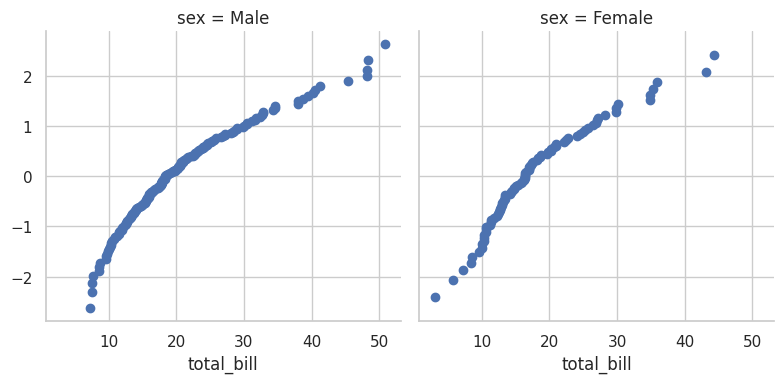

In [ ]:
from scipy import stats
def quantile_plot(x, **kwargs):
    quantiles, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, quantiles, **kwargs)

g = sns.FacetGrid(tips, col="sex", height=4)
g.map(quantile_plot, "total_bill")